In [6]:
import sys
sys.path.append("../scripts")

from utils import (
    save_graph, load_graph,
    save_embeddings, load_embeddings,
    plot_tsne
)

In [1]:
import pickle

with open("../data/processed/transaction_graph.gpickle", "rb") as f:
    G = pickle.load(f)

# Generate node2vec embeddings

In [2]:
from node2vec import Node2Vec

# Configure node2vec
node2vec = Node2Vec(
    G,
    dimensions=64,
    walk_length=30,
    num_walks=200,
    workers=4,  # Use multicore if available
    seed=42
)

# Fit and transform to get embeddings
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get embeddings as a dict: {node_id: vector}
embeddings = {str(node): model.wv[str(node)] for node in G.nodes()}

/Users/joy/Git/graph-taxpayer-network/graph-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 4): 100%|██████████| 50/50 [00:01<00:00, 36.68it/s]


# Save the embeddings

In [3]:
import numpy as np

np.save("../data/processed/node_embeddings.npy", embeddings)

# Visualize embeddings with t-SNE

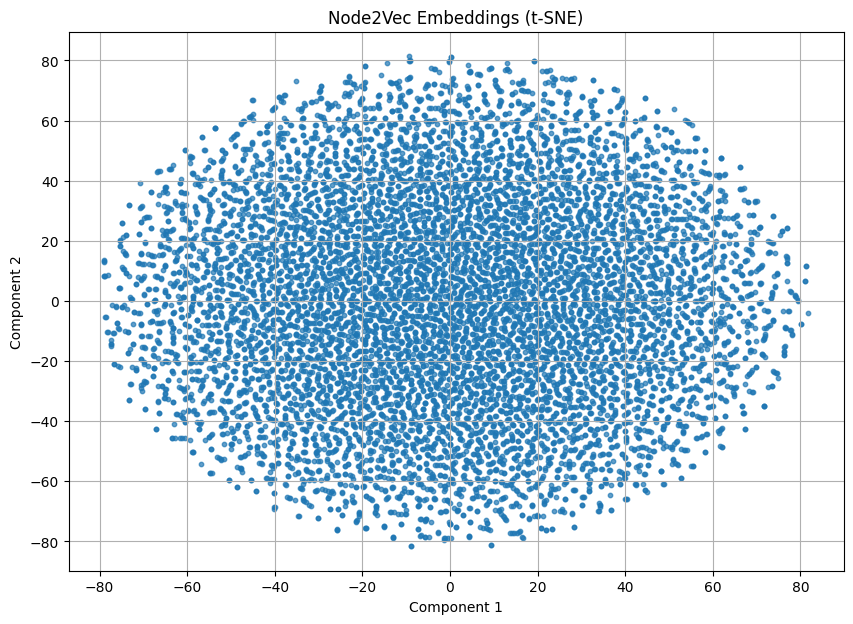

In [5]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert embeddings to matrix
X = np.array(list(embeddings.values()))
labels = list(embeddings.keys())

# Reduce dimensions to 2D for plotting
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=10, alpha=0.7)
plt.title("Node2Vec Embeddings (t-SNE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()